In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_data= pd.read_csv("C:/Users/joshi/Downloads/train.csv (1)/train.csv", parse_dates = ['date'])
train_data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
test_data= pd.read_csv("C:/Users/joshi/Downloads/test (2).csv", parse_dates = ['date'])
test_data

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [5]:
data= pd.concat([train_data, test_data],sort= False)
data

,date,store,item,sales,id
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,NaN
4,2013-01-05,1,1,10.0,NaN
...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0
44996,2018-03-28,10,50,NaN,44996.0
44997,2018-03-29,10,50,NaN,44997.0
44998,2018-03-30,10,50,NaN,44998.0


In [6]:
data.shape


(958000, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   store   958000 non-null  int64         
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
 4   id      45000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [8]:
data.isnull().sum()

date          0
store         0
item          0
sales     45000
id       913000
dtype: int64

In [9]:
data[data.duplicated()]


,date,store,item,sales,id


In [10]:
data['store'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [11]:
data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [12]:
data.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})
                            

sales                                                    
       count        sum       mean median        std  min    max
store                                                           
1      91300  4315603.0  47.268379   44.0  24.006252  1.0  155.0
2      91300  6120128.0  67.033165   62.0  33.595810  3.0  231.0
3      91300  5435144.0  59.530602   55.0  29.974102  3.0  196.0
4      91300  5012639.0  54.902946   51.0  27.733097  4.0  186.0
5      91300  3631016.0  39.770164   37.0  20.365757  2.0  130.0
6      91300  3627670.0  39.733516   37.0  20.310451  0.0  134.0
7      91300  3320009.0  36.363735   34.0  18.684825  1.0  122.0
8      91300  5856169.0  64.142048   60.0  32.231751  4.0  204.0
9      91300  5025976.0  55.049025   51.0  27.832186  4.0  195.0
10     91300  5360158.0  58.709288   54.0  29.554994  3.0  187.0

In [13]:
data.groupby(['store'])['item'].nunique()


store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [14]:
data.groupby(["store"]).agg({"sales": ["sum"]})

,sales
,sum
store,
1,4315603.0
2,6120128.0
3,5435144.0
4,5012639.0
5,3631016.0
6,3627670.0
7,3320009.0
8,5856169.0


In [15]:
data.groupby(['store','item']).agg({'sales':[ 'sum', 'mean', 'median', 'std']})

sales                             
                 sum       mean median        std
store item                                       
1     1      36468.0  19.971522   19.0   6.741022
      2      97050.0  53.148959   52.0  15.005779
      3      60638.0  33.208105   33.0  10.072529
      4      36440.0  19.956188   20.0   6.640618
      5      30335.0  16.612815   16.0   5.672102
...              ...        ...    ...        ...
10    46    120601.0  66.046550   65.0  18.114991
      47     45204.0  24.755750   24.0   7.924820
      48    105570.0  57.814896   57.0  15.898538
      49     60317.0  33.032311   32.0  10.091610
      50    135192.0  74.037240   73.0  19.937566

[500 rows x 4 columns]

In [16]:
train_data.date.nunique()

1826

In [17]:
indexes_train = []


In [18]:
for i in range(train_data.store.nunique()*train_data.item.nunique()):
    indexes_train = np.append(indexes_train, np.linspace(0, train_data.date.nunique()-1, train_data.date.nunique(), dtype=int))
    i=+1
indexes_train

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.823e+03, 1.824e+03,
       1.825e+03])

In [19]:
indexes_train.shape

(913000,)

In [20]:
train_data["indexes"]=indexes_train
train_data

,date,store,item,sales,indexes
0,2013-01-01,1,1,13,0.0
1,2013-01-02,1,1,11,1.0
2,2013-01-03,1,1,14,2.0
3,2013-01-04,1,1,13,3.0
4,2013-01-05,1,1,10,4.0
...,...,...,...,...,...
912995,2017-12-27,10,50,63,1821.0
912996,2017-12-28,10,50,59,1822.0
912997,2017-12-29,10,50,74,1823.0
912998,2017-12-30,10,50,62,1824.0


In [21]:
indexes_test = []

In [22]:
for i in range(test_data.store.nunique()*test_data.item.nunique()):
    indexes_test = np.append(indexes_test, np.linspace(0, test_data.date.nunique()-1, test_data.date.nunique(), dtype=int))
    i=+1
indexes_test

array([ 0.,  1.,  2., ..., 87., 88., 89.])

In [23]:
indexes_test.shape

(45000,)

In [25]:
test_data["indexes"]=indexes_test
test_data


,id,date,store,item,indexes
0,0,2018-01-01,1,1,0.0
1,1,2018-01-02,1,1,1.0
2,2,2018-01-03,1,1,2.0
3,3,2018-01-04,1,1,3.0
4,4,2018-01-05,1,1,4.0
...,...,...,...,...,...
44995,44995,2018-03-27,10,50,85.0
44996,44996,2018-03-28,10,50,86.0
44997,44997,2018-03-29,10,50,87.0
44998,44998,2018-03-30,10,50,88.0


In [26]:
data= pd.concat([train_data, test_data], sort= False)
data

,date,store,item,sales,indexes,id
0,2013-01-01,1,1,13.0,0.0,NaN
1,2013-01-02,1,1,11.0,1.0,NaN
2,2013-01-03,1,1,14.0,2.0,NaN
3,2013-01-04,1,1,13.0,3.0,NaN
4,2013-01-05,1,1,10.0,4.0,NaN
...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,85.0,44995.0
44996,2018-03-28,10,50,NaN,86.0,44996.0
44997,2018-03-29,10,50,NaN,87.0,44997.0
44998,2018-03-30,10,50,NaN,88.0,44998.0


In [27]:
hour = 60*60 # 1 hour 60*60 seconds...
day  = 24*hour
week = 7*day
year = 365.2425*day

In [28]:
df1=data.copy()

In [29]:
df1["index_second"]= df1["indexes"]*day #seconds difference compared to the first day
df1

,date,store,item,sales,indexes,id,index_second
0,2013-01-01,1,1,13.0,0.0,NaN,0.0
1,2013-01-02,1,1,11.0,1.0,NaN,86400.0
2,2013-01-03,1,1,14.0,2.0,NaN,172800.0
3,2013-01-04,1,1,13.0,3.0,NaN,259200.0
4,2013-01-05,1,1,10.0,4.0,NaN,345600.0
...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,85.0,44995.0,7344000.0
44996,2018-03-28,10,50,NaN,86.0,44996.0,7430400.0
44997,2018-03-29,10,50,NaN,87.0,44997.0,7516800.0
44998,2018-03-30,10,50,NaN,88.0,44998.0,7603200.0


In [30]:
df1["YEAR_index_norm"] = 2 * np.pi * df1["index_second"] / year
df1["YEAR_cos_index"] = np.cos(df1["YEAR_index_norm"])
df1["YEAR_sin_index"] = np.sin(df1["YEAR_index_norm"])
df1

,date,store,item,sales,indexes,id,index_second,YEAR_index_norm,YEAR_cos_index,YEAR_sin_index
0,2013-01-01,1,1,13.0,0.0,NaN,0.0,0.000000,1.000000,0.000000
1,2013-01-02,1,1,11.0,1.0,NaN,86400.0,0.017203,0.999852,0.017202
2,2013-01-03,1,1,14.0,2.0,NaN,172800.0,0.034406,0.999408,0.034399
3,2013-01-04,1,1,13.0,3.0,NaN,259200.0,0.051608,0.998669,0.051585
4,2013-01-05,1,1,10.0,4.0,NaN,345600.0,0.068811,0.997633,0.068757
...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,85.0,44995.0,7344000.0,1.462236,0.108347,0.994113
44996,2018-03-28,10,50,NaN,86.0,44996.0,7430400.0,1.479439,0.091230,0.995830
44997,2018-03-29,10,50,NaN,87.0,44997.0,7516800.0,1.496642,0.074087,0.997252
44998,2018-03-30,10,50,NaN,88.0,44998.0,7603200.0,1.513844,0.056921,0.998379


<AxesSubplot:>

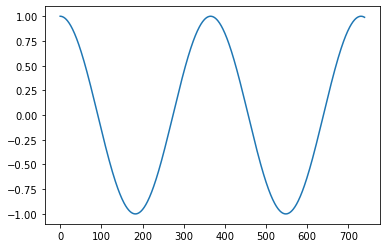

In [31]:
#for example, cos for 2 year for store=1, item=1...
df1.iloc[0:740, 8].plot()

<AxesSubplot:>

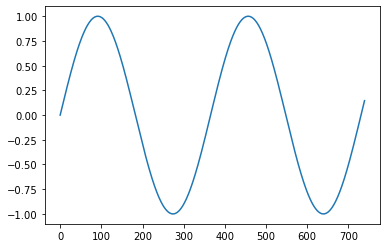

In [32]:
#for example, sin for 2 year for store=1, item=1...
df1.iloc[0:740, 9].plot()

In [33]:
df2 = df1.drop(["indexes","index_second","YEAR_index_norm"], axis=1) #lets remove unnecessary features
df2.head()

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index
0,2013-01-01,1,1,13.0,NaN,1.000000,0.000000
1,2013-01-02,1,1,11.0,NaN,0.999852,0.017202
2,2013-01-03,1,1,14.0,NaN,0.999408,0.034399
3,2013-01-04,1,1,13.0,NaN,0.998669,0.051585
4,2013-01-05,1,1,10.0,NaN,0.997633,0.068757


In [34]:
def create_date_time_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.date.dt.dayofweek
    df['quarter'] = df.date.dt.quarter
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofmonth'] = df.date.dt.day
    df['weekofyear'] = df.date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [35]:
create_date_time_features(df2)

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2013-01-01,1,1,13.0,NaN,1.000000,0.000000,1,1,1,2013,1,1,1,0
1,2013-01-02,1,1,11.0,NaN,0.999852,0.017202,2,1,1,2013,2,2,1,0
2,2013-01-03,1,1,14.0,NaN,0.999408,0.034399,3,1,1,2013,3,3,1,0
3,2013-01-04,1,1,13.0,NaN,0.998669,0.051585,4,1,1,2013,4,4,1,0
4,2013-01-05,1,1,10.0,NaN,0.997633,0.068757,5,1,1,2013,5,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0,0.108347,0.994113,1,1,3,2018,86,27,13,1
44996,2018-03-28,10,50,NaN,44996.0,0.091230,0.995830,2,1,3,2018,87,28,13,1
44997,2018-03-29,10,50,NaN,44997.0,0.074087,0.997252,3,1,3,2018,88,29,13,1
44998,2018-03-30,10,50,NaN,44998.0,0.056921,0.998379,4,1,3,2018,89,30,13,1


In [36]:
df2

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index
0,2013-01-01,1,1,13.0,NaN,1.000000,0.000000
1,2013-01-02,1,1,11.0,NaN,0.999852,0.017202
2,2013-01-03,1,1,14.0,NaN,0.999408,0.034399
3,2013-01-04,1,1,13.0,NaN,0.998669,0.051585
4,2013-01-05,1,1,10.0,NaN,0.997633,0.068757
...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0,0.108347,0.994113
44996,2018-03-28,10,50,NaN,44996.0,0.091230,0.995830
44997,2018-03-29,10,50,NaN,44997.0,0.074087,0.997252
44998,2018-03-30,10,50,NaN,44998.0,0.056921,0.998379


In [37]:
df3 = df2.copy()


In [38]:
df3= create_date_time_features(df3)
df3

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2013-01-01,1,1,13.0,NaN,1.000000,0.000000,1,1,1,2013,1,1,1,0
1,2013-01-02,1,1,11.0,NaN,0.999852,0.017202,2,1,1,2013,2,2,1,0
2,2013-01-03,1,1,14.0,NaN,0.999408,0.034399,3,1,1,2013,3,3,1,0
3,2013-01-04,1,1,13.0,NaN,0.998669,0.051585,4,1,1,2013,4,4,1,0
4,2013-01-05,1,1,10.0,NaN,0.997633,0.068757,5,1,1,2013,5,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0,0.108347,0.994113,1,1,3,2018,86,27,13,1
44996,2018-03-28,10,50,NaN,44996.0,0.091230,0.995830,2,1,3,2018,87,28,13,1
44997,2018-03-29,10,50,NaN,44997.0,0.074087,0.997252,3,1,3,2018,88,29,13,1
44998,2018-03-30,10,50,NaN,44998.0,0.056921,0.998379,4,1,3,2018,89,30,13,1


In [39]:
df4= df3.copy()

In [40]:
def lag_features(df, lags):
    for lag in lags:
        df['sales_lag_' + str(lag)] = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag))
        df.fillna(0, inplace=True)
    return df

In [41]:
lag_features(df4, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])
df4

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728
0,2013-01-01,1,1,13.0,0.0,1.000000,0.000000,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,1,1,11.0,0.0,0.999852,0.017202,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,1,1,14.0,0.0,0.999408,0.034399,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,1,1,13.0,0.0,0.998669,0.051585,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,1,1,10.0,0.0,0.997633,0.068757,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,0.0,44995.0,0.108347,0.994113,1,1,3,...,41.0,54.0,67.0,68.0,68.0,81.0,79.0,60.0,97.0,73.0
44996,2018-03-28,10,50,0.0,44996.0,0.091230,0.995830,2,1,3,...,63.0,51.0,67.0,60.0,76.0,81.0,80.0,73.0,80.0,68.0
44997,2018-03-29,10,50,0.0,44997.0,0.074087,0.997252,3,1,3,...,59.0,63.0,72.0,66.0,73.0,87.0,82.0,68.0,99.0,75.0
44998,2018-03-30,10,50,0.0,44998.0,0.056921,0.998379,4,1,3,...,74.0,75.0,72.0,67.0,66.0,81.0,90.0,69.0,79.0,83.0


In [42]:
def roll_mean_features(df, windows):
    for window in windows:
        df['sales_roll_mean_' + str(window)] = df.groupby(["store", "item"])['sales']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
        df.fillna(0, inplace=True)
    return df

In [43]:
df5= df4.copy()

In [44]:
df5= roll_mean_features(df5, [365, 546])
df5

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_roll_mean_365,sales_roll_mean_546
0,2013-01-01,1,1,13.0,0.0,1.000000,0.000000,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2013-01-02,1,1,11.0,0.0,0.999852,0.017202,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2013-01-03,1,1,14.0,0.0,0.999408,0.034399,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,2013-01-04,1,1,13.0,0.0,0.998669,0.051585,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2013-01-05,1,1,10.0,0.0,0.997633,0.068757,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,0.0,44995.0,0.108347,0.994113,1,1,3,...,67.0,68.0,68.0,81.0,79.0,60.0,97.0,73.0,78.455254,81.743476
44996,2018-03-28,10,50,0.0,44996.0,0.091230,0.995830,2,1,3,...,67.0,60.0,76.0,81.0,80.0,73.0,80.0,68.0,78.161605,81.674140
44997,2018-03-29,10,50,0.0,44997.0,0.074087,0.997252,3,1,3,...,72.0,66.0,73.0,87.0,82.0,68.0,99.0,75.0,77.865209,81.603658
44998,2018-03-30,10,50,0.0,44998.0,0.056921,0.998379,4,1,3,...,72.0,67.0,66.0,81.0,90.0,69.0,79.0,83.0,77.565828,81.531518


In [45]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    dataframe.fillna(0, inplace=True)
    return dataframe

In [46]:
df6= df5.copy()

In [47]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df6= ewm_features(df6, alphas, lags)

df6.head()

,date,store,item,sales,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_ewm_alpha_07_lag_728,sales_ewm_alpha_05_lag_91,sales_ewm_alpha_05_lag_98,sales_ewm_alpha_05_lag_105,sales_ewm_alpha_05_lag_112,sales_ewm_alpha_05_lag_180,sales_ewm_alpha_05_lag_270,sales_ewm_alpha_05_lag_365,sales_ewm_alpha_05_lag_546,sales_ewm_alpha_05_lag_728
0,2013-01-01,1,1,13.0,0.0,1.000000,0.000000,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,1,1,11.0,0.0,0.999852,0.017202,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,1,1,14.0,0.0,0.999408,0.034399,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,1,1,13.0,0.0,0.998669,0.051585,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,1,1,10.0,0.0,0.997633,0.068757,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         958000 non-null  datetime64[ns]
 1   store                        958000 non-null  int64         
 2   item                         958000 non-null  int64         
 3   sales                        958000 non-null  float64       
 4   id                           958000 non-null  float64       
 5   YEAR_cos_index               958000 non-null  float64       
 6   YEAR_sin_index               958000 non-null  float64       
 7   dayofweek                    958000 non-null  int64         
 8   quarter                      958000 non-null  int64         
 9   month                        958000 non-null  int64         
 10  year                         958000 non-null  int64         
 11  dayofyear                  

In [49]:
df6.shape

(958000, 72)

In [50]:
df7 = pd.get_dummies(df6, columns=['store', 'item', 'dayofweek', "quarter", 'month', "year", "season"])
df7.shape

(958000, 158)

In [51]:
df7['sales']= np.log1p(df7["sales"].values)
df7.head()

,date,sales,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,2013-01-01,2.639057,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,2013-01-02,2.484907,0.0,0.999852,0.017202,2,2,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,2013-01-03,2.708050,0.0,0.999408,0.034399,3,3,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,2013-01-04,2.639057,0.0,0.998669,0.051585,4,4,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,2013-01-05,2.397895,0.0,0.997633,0.068757,5,5,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0


In [52]:
df_model= df7.copy()

In [53]:
df_model = df_model.sort_values("date").reset_index(drop = True)

In [54]:
train= df_model.loc[(df_model["date"] <  "2017-01-01"), :]

val=   df_model.loc[(df_model["date"] >= "2017-01-01") & (df_model["date"] < "2017-04-01"), :]

In [55]:
train


,date,sales,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,2013-01-01,2.639057,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,2013-01-01,2.833213,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,2013-01-01,3.044522,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,2013-01-01,3.555348,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,2013-01-01,2.995732,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730495,2016-12-31,4.060443,0.0,0.999861,-0.016686,366,31,52,75.0,61.0,...,0,0,0,1,0,0,1,0,0,0
730496,2016-12-31,3.610918,0.0,0.999861,-0.016686,366,31,52,48.0,54.0,...,0,0,0,1,0,0,1,0,0,0
730497,2016-12-31,3.367296,0.0,0.999861,-0.016686,366,31,52,44.0,33.0,...,0,0,0,1,0,0,1,0,0,0
730498,2016-12-31,4.025352,0.0,0.999861,-0.016686,366,31,52,59.0,75.0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]

In [57]:
X_train = train[cols]
Y_train = train['sales']

X_val = val[cols]
Y_val = val['sales']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((730500, 155), (730500,), (45000, 155), (45000,))

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras import metrics
# import tensorflow as tf

In [59]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))#The Input Layer

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers

NN_model.add(Dropout(0.2))#Dropout layer

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))#The Output Layer

#Compile the network
NN_model.compile(loss=tf.keras.losses.mae, optimizer="adam", metrics=['mae'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19968     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 184,833
Trainable params: 184,833
Non-trai

In [60]:
#Define a checkpoint callback :
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [61]:
#Train the model
NN_model.fit(X_train.values, Y_train.values, epochs=2, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/2
18262/18263 [============================>.] - ETA: 0s - loss: 0.2043 - mae: 0.2043
Epoch 1: val_loss improved from inf to 0.12429, saving model to Weights-001--0.12429.hdf5
18263/18263 [==============================] - 140s 7ms/step - loss: 0.2043 - mae: 0.2043 - val_loss: 0.1243 - val_mae: 0.1243
Epoch 2/2
18258/18263 [============================>.] - ETA: 0s - loss: 0.1514 - mae: 0.1514
Epoch 2: val_loss improved from 0.12429 to 0.11813, saving model to Weights-002--0.11813.hdf5
18263/18263 [==============================] - 131s 7ms/step - loss: 0.1514 - mae: 0.1514 - val_loss: 0.1181 - val_mae: 0.1181


In [62]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

In [63]:
print("VALID SMAPE:", smape(np.expm1(NN_model.predict(X_val).flatten()), np.expm1(Y_val)))

1407/1407 [==============================] - 7s 3ms/step
VALID SMAPE: 14.039074082095212


In [64]:
print("VALID SMAPE:", smape(np.expm1(NN_model.predict(X_val).flatten()), np.expm1(Y_val)))

1407/1407 [==============================] - 5s 4ms/step
VALID SMAPE: 14.039074082095212


In [65]:
df_final_model= df7.copy()
train = df_final_model.loc[(df_final_model["date"] <  "2018-01-01"), :]
Y_train = train['sales']
X_train = train[cols]

test = df_final_model.loc[(df_final_model["date"] >=  "2018-01-01"), :]
X_test = test[cols]

In [66]:
df_final_model

,date,sales,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,2013-01-01,2.639057,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,2013-01-02,2.484907,0.0,0.999852,0.017202,2,2,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,2013-01-03,2.708050,0.0,0.999408,0.034399,3,3,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,2013-01-04,2.639057,0.0,0.998669,0.051585,4,4,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,2013-01-05,2.397895,0.0,0.997633,0.068757,5,5,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,0.000000,44995.0,0.108347,0.994113,86,27,13,41.0,54.0,...,0,0,0,0,0,1,0,1,0,0
44996,2018-03-28,0.000000,44996.0,0.091230,0.995830,87,28,13,63.0,51.0,...,0,0,0,0,0,1,0,1,0,0
44997,2018-03-29,0.000000,44997.0,0.074087,0.997252,88,29,13,59.0,63.0,...,0,0,0,0,0,1,0,1,0,0
44998,2018-03-30,0.000000,44998.0,0.056921,0.998379,89,30,13,74.0,75.0,...,0,0,0,0,0,1,0,1,0,0


In [67]:
X_train

,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,1.000000,0.000000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,0.999852,0.017202,2,2,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0.999408,0.034399,3,3,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,0.998669,0.051585,4,4,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.997633,0.068757,5,5,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0.995982,-0.089549,361,27,52,80.0,72.0,84.0,79.0,79.0,...,0,0,0,0,1,0,1,0,0,0
912996,0.997375,-0.072403,362,28,52,82.0,89.0,90.0,78.0,89.0,...,0,0,0,0,1,0,1,0,0,0
912997,0.998473,-0.055236,363,29,52,90.0,97.0,94.0,97.0,96.0,...,0,0,0,0,1,0,1,0,0,0
912998,0.999276,-0.038052,364,30,52,103.0,97.0,97.0,93.0,92.0,...,0,0,0,0,1,0,1,0,0,0


In [68]:
X_test

,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,1.000000,0.000000,1,1,1,12.0,14.0,22.0,16.0,12.0,...,0,0,0,0,0,1,1,0,0,0
1,0.999852,0.017202,2,2,1,18.0,18.0,21.0,20.0,26.0,...,0,0,0,0,0,1,1,0,0,0
2,0.999408,0.034399,3,3,1,15.0,27.0,20.0,13.0,24.0,...,0,0,0,0,0,1,1,0,0,0
3,0.998669,0.051585,4,4,1,20.0,23.0,20.0,26.0,29.0,...,0,0,0,0,0,1,1,0,0,0
4,0.997633,0.068757,5,5,1,19.0,28.0,28.0,28.0,28.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.108347,0.994113,86,27,13,41.0,54.0,67.0,68.0,68.0,...,0,0,0,0,0,1,0,1,0,0
44996,0.091230,0.995830,87,28,13,63.0,51.0,67.0,60.0,76.0,...,0,0,0,0,0,1,0,1,0,0
44997,0.074087,0.997252,88,29,13,59.0,63.0,72.0,66.0,73.0,...,0,0,0,0,0,1,0,1,0,0
44998,0.056921,0.998379,89,30,13,74.0,75.0,72.0,67.0,66.0,...,0,0,0,0,0,1,0,1,0,0


In [69]:
test_predictions = NN_model.predict(X_test).flatten()

1407/1407 [==============================] - 5s 4ms/step


In [70]:
test_results = pd.DataFrame(data={'Test Predictions':np.expm1(test_predictions)})
test_results

,Test Predictions
0,12.412621
1,14.893514
2,14.941491
3,15.884628
4,17.166363
...,...
44995,73.112869
44996,72.245659
44997,75.928284
44998,77.830658


In [71]:
submission_df = test.loc[:, ['id', 'sales']]
submission_df['sales'] = np.expm1(test_predictions)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

,id,sales
0,0,12.412621
1,1,14.893514
2,2,14.941491
3,3,15.884628
4,4,17.166363


In [72]:
submission_df.to_csv('submission.csv', index=False)